In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def get_lower_and_upper_bounds(series, k=1.5):
    ''' 
    return a list of values that are above the upper and below the lower bounds
    based on the passed multiplier k
    '''
    # get quartiles
    q1 = series.describe()[4]
    q3 = series.describe()[6]
    iqr = q3 - q1   # calculate interquartile range

    upper_bound = q3 + k * iqr   # get upper bound
    lower_bound = q1 - k * iqr   # get lower bound
#     print(f'lower bound: {lower_bound}')
    # return the values above upper and below lower bounds
    upper = series[(series > upper_bound)]
    lower = series[(series < lower_bound)]
#     print(f'{lower}')
    return upper, lower

# Part 1
Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemonade = pd.read_csv('lemonade.csv')

In [4]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [53]:
lemonade.shape

(365, 7)

In [5]:
lemonade.columns.to_list()

['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

### 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [6]:
num_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [51]:
for col in lemonade[num_cols]:
    _, lower_1_5 = get_lower_and_upper_bounds(lemonade[col])
    if len(lower_1_5):
        print(f'lower outliers for column: {col}')
        print(f'{lower_1_5}\n')

lower outliers for column: Temperature
364    15.1
Name: Temperature, dtype: float64

lower outliers for column: Flyers
324   -38
Name: Flyers, dtype: int64



#### The temperature outlier is fine to keep, but a -38 flyers doesn't make sense, so we can remove that

### 2.Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [50]:
for col in lemonade[num_cols]:
    upper_1_5, lower_1_5 = get_lower_and_upper_bounds(lemonade[col])
    if len(upper_1_5):
        print(f'high outliers for column: {col}')
        print(f'{upper_1_5}\n')

high outliers for column: Temperature
41    212.0
Name: Temperature, dtype: float64

high outliers for column: Rainfall
0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

high outliers for column: Flyers
166    77
194    80
Name: Flyers, dtype: int64

high outliers for column: Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



In [57]:
lemonade.Sales.mean()

27.865753424657534

In [58]:
lemonade.Sales.std()

30.948131985639645

#### Temp outlier of 212 degrees should be removed, rainfall outliers seem fine, flyers outliers seem fine. The sales outliers are all very far from the mean, which seems odd.

### 3. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [55]:
for col in lemonade[num_cols]:
    _, lower_3 = get_lower_and_upper_bounds(lemonade[col], k=3)
    if len(lower_3):
        print(f'lower outliers for column: {col}')
        print(f'{lower_3}\n')

lower outliers for column: Flyers
324   -38
Name: Flyers, dtype: int64



#### The low outlier on flyers of -38 still doesn't make sense so we shoud remove it

In [56]:
for col in lemonade[num_cols]:
    upper_3, _ = get_lower_and_upper_bounds(lemonade[col], k=3)
    if len(upper_3):
        print(f'high outliers for column: {col}')
        print(f'{upper_3}\n')

high outliers for column: Temperature
41    212.0
Name: Temperature, dtype: float64

high outliers for column: Rainfall
0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

high outliers for column: Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



#### The rainfall outlier seems plausable, but the temperature and sales outliers seem too odd to keep.

# Part 2
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

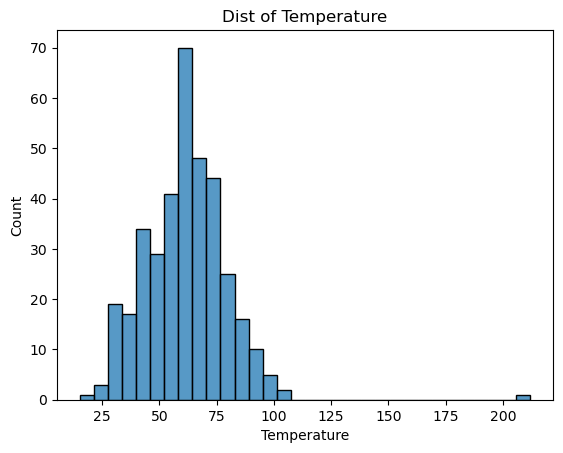

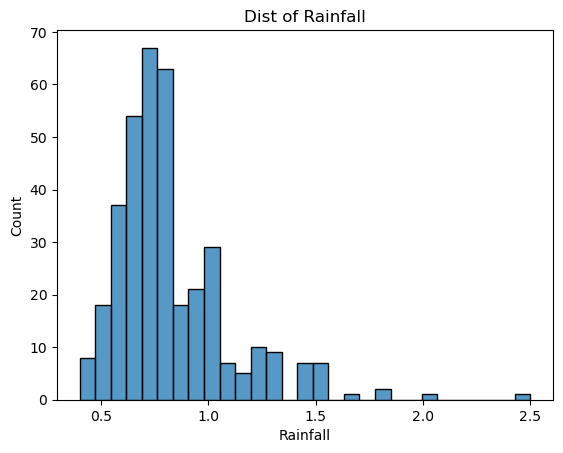

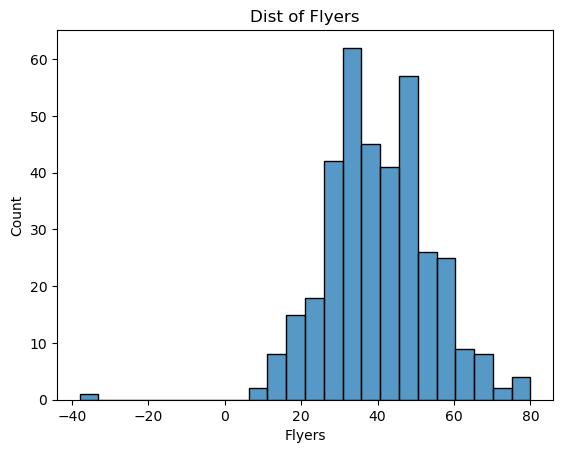

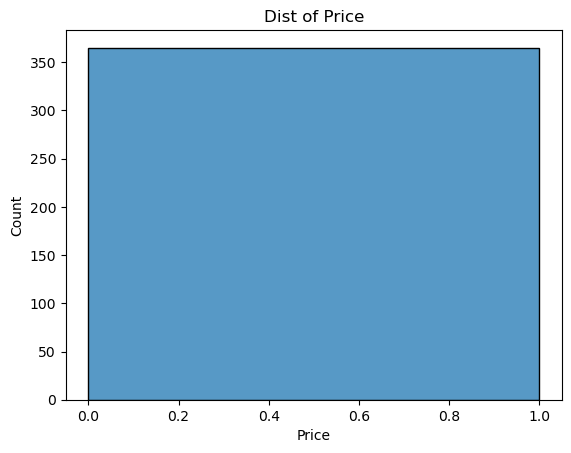

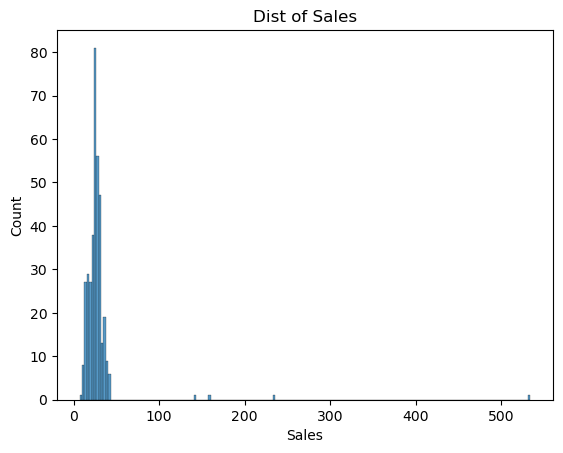

In [62]:
for col in lemonade[num_cols]:
    sns.histplot(lemonade[col])
    plt.title(f'Dist of {col}')
    plt.show()

#### Temperature and flyers appear normal without the outliers, sales might also be normal without the outliers. price is constant, and rainfall appears right skewed

In [63]:
lemonade.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [64]:
def get_lower_and_upper_bounds_std(series, k=2):
    ''' 
    return a list of values that are above the upper and below the lower bounds
    based on the passed multiplier k
    '''
    # get quartiles
    mean = series.describe()[1]
    std = series.describe()[2]

    upper_bound = mean + k * std   # get upper bound
    lower_bound = mean - k * std   # get lower bound
#     print(f'lower bound: {lower_bound}')
    # return the values above upper and below lower bounds
    upper = series[(series > upper_bound)]
    lower = series[(series < lower_bound)]
#     print(f'{lower}')
    return upper, lower

### 1. Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [65]:
for col in lemonade[num_cols]:
    upper_2_std, lower_2_std = get_lower_and_upper_bounds_std(lemonade[col], k=2)
    if len(lower_2_std):
        print(f'low outliers for column: {col}')
        print(f'{lower_2_std}\n')
    if len(upper_2_std):
        print(f'high outliers for column: {col}')
        print(f'{upper_2_std}\n')

low outliers for column: Temperature
338    22.0
364    15.1
Name: Temperature, dtype: float64

high outliers for column: Temperature
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
Name: Temperature, dtype: float64

high outliers for column: Rainfall
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

low outliers for column: Flyers
324   -38
338    11
364     9
Name: Flyers, dtype: int64

high outliers for column: Flyers
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
Name: Flyers, dtype: int64

high outliers for column: Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



#### The low outliers for temp seem fine, most of the high outliers for temp seem fine, except for the 212. rainfall outliers all seem fine. The flyers outliers seem fine except for the -38 which doesn't make sense. Sales outliers seem too far away from normal.

### 2. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [66]:
for col in lemonade[num_cols]:
    upper_2_std, lower_2_std = get_lower_and_upper_bounds_std(lemonade[col], k=3)
    if len(lower_2_std):
        print(f'low outliers for column: {col}')
        print(f'{lower_2_std}\n')
    if len(upper_2_std):
        print(f'high outliers for column: {col}')
        print(f'{upper_2_std}\n')

high outliers for column: Temperature
41    212.0
Name: Temperature, dtype: float64

high outliers for column: Rainfall
0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

low outliers for column: Flyers
324   -38
Name: Flyers, dtype: int64

high outliers for column: Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



#### The temp outlier of 212 doesn't make sense. The rainfall outliers seem fine. The flyers outlier of -38 doesn't make sense. sales outliers still seem too far from normal.